In [1]:
#Importing relevant python packages
import pandas as pd

In [2]:
#Reading in all relevant datasets
products = pd.read_csv("C:\\Users\\apoor\\Downloads\\olist_products_dataset.csv\\olist_products_dataset.csv")
order = pd.read_csv("C:\\Users\\apoor\\Downloads\\olist_orders_dataset.csv\\olist_orders_dataset.csv")
review = pd.read_csv("C:\\Users\\apoor\\Downloads\\olist_order_reviews_dataset.csv\\olist_order_reviews_dataset.csv")
payment = pd.read_csv("C:\\Users\\apoor\\Downloads\\olist_order_payments_dataset.csv\\olist_order_payments_dataset.csv")
order_items = pd.read_csv("C:\\Users\\apoor\\Downloads\\olist_order_items_dataset.csv\\olist_order_items_dataset.csv")
location = pd.read_csv("C:\\Users\\apoor\\Downloads\\olist_geolocation_dataset.csv\\olist_geolocation_dataset.csv")
customers = pd.read_csv("C:\\Users\\apoor\\Downloads\\olist_customers_dataset.csv\\olist_customers_dataset.csv")
sellers = pd.read_csv("C:\\Users\\apoor\\Downloads\\olist_sellers_dataset.csv")
product_description =pd.read_csv("C:\\Users\\apoor\\Downloads\\product_category_name_translation.csv")

In [3]:
order.shape[0]

99441

In [4]:

#Merging the datasets as one
merged = pd.merge(order, order_items, on='order_id', how='left')
merged = pd.merge(merged, products, on='product_id', how='left')
merged = pd.merge(merged, payment, on='order_id', how='left')
merged = pd.merge(merged, review, on='order_id', how='left')
merged = pd.merge(merged, customers, on='customer_id', how='left')
merged = pd.merge(merged, sellers, on='seller_id', how='left')
merged = pd.merge(merged, product_description, on='product_category_name', how='left')

In [5]:
merged.shape[0]

119143

In [6]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

In [7]:
# Now getting the marketting Funnel dataset
mql = pd.read_csv("C:\\Users\\apoor\\Downloads\\olist_marketing_qualified_leads_dataset.csv")
cd = pd.read_csv("C:\\Users\\apoor\\Downloads\\olist_closed_deals_dataset.csv")
mf = mql.merge(cd, on='mql_id', how='left')
mf_sellers = mf.merge(sellers, on='seller_id', how='left')
mf_items = mf.merge(order_items, on='seller_id', how='left')


In [8]:
mf_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         8000 non-null   object 
 1   first_contact_date             8000 non-null   object 
 2   landing_page_id                8000 non-null   object 
 3   origin                         7940 non-null   object 
 4   seller_id                      842 non-null    object 
 5   sdr_id                         842 non-null    object 
 6   sr_id                          842 non-null    object 
 7   won_date                       842 non-null    object 
 8   business_segment               841 non-null    object 
 9   lead_type                      836 non-null    object 
 10  lead_behaviour_profile         665 non-null    object 
 11  has_company                    63 non-null     object 
 12  has_gtin                       64 non-null     o

In [9]:
mf_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12664 entries, 0 to 12663
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         12664 non-null  object 
 1   first_contact_date             12664 non-null  object 
 2   landing_page_id                12664 non-null  object 
 3   origin                         12597 non-null  object 
 4   seller_id                      5506 non-null   object 
 5   sdr_id                         5506 non-null   object 
 6   sr_id                          5506 non-null   object 
 7   won_date                       5506 non-null   object 
 8   business_segment               5505 non-null   object 
 9   lead_type                      5455 non-null   object 
 10  lead_behaviour_profile         3679 non-null   object 
 11  has_company                    88 non-null     object 
 12  has_gtin                       89 non-null    

In [10]:
merged['review_score'].mean()

np.float64(4.015582414978078)

In [11]:
merged.groupby('order_status')['review_score'].mean()

order_status
approved       2.000000
canceled       1.824658
created        2.333333
delivered      4.080488
invoiced       1.650538
processing     1.348649
shipped        1.976884
unavailable    1.512539
Name: review_score, dtype: float64

In [12]:
merged.groupby('order_status')['order_id'].count()

order_status
approved            3
canceled          750
created             5
delivered      115723
invoiced          378
processing        376
shipped          1256
unavailable       652
Name: order_id, dtype: int64

C:\Users\apoor\AppData\Local\Temp\ipykernel_3744\918412244.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['review_score']


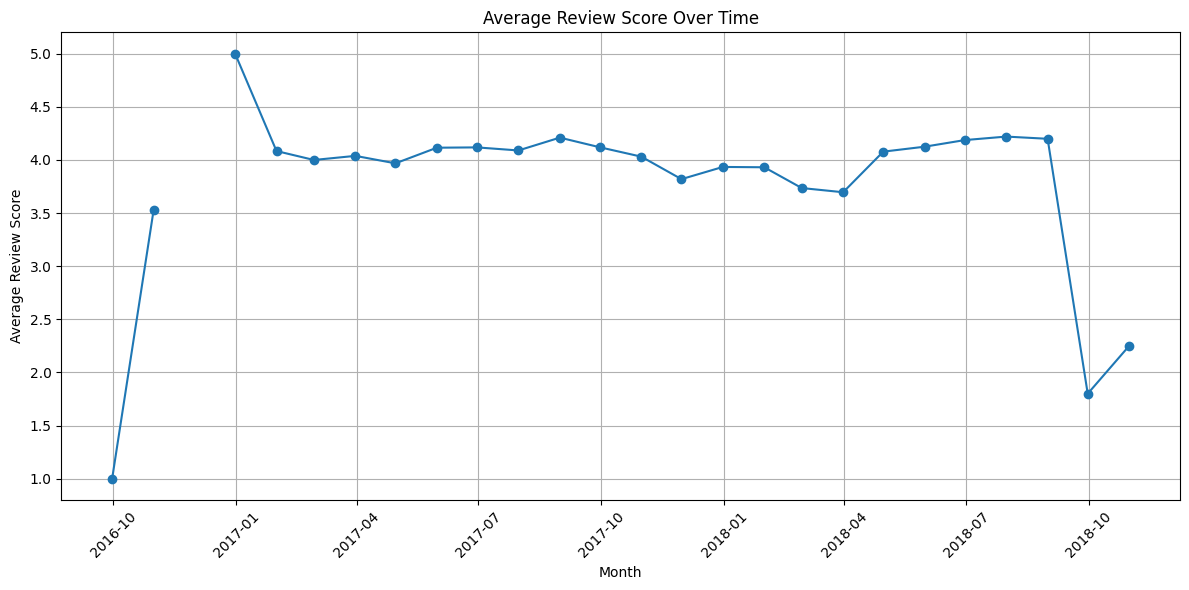

In [13]:
# Ensure the timestamp is in datetime format
merged['order_purchase_timestamp'] = pd.to_datetime(merged['order_purchase_timestamp'], errors='coerce')

# Drop rows with missing values in required columns
filtered = merged.dropna(subset=['order_purchase_timestamp', 'review_score'])

# Group by month and compute average review score
monthly_reviews = (
    filtered
    .set_index('order_purchase_timestamp')
    .resample('M')['review_score']
    .mean()
)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_reviews.index, monthly_reviews.values, marker='o')
plt.title("Average Review Score Over Time")
plt.xlabel("Month")
plt.ylabel("Average Review Score")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
merged.groupby('review_score')['seller_id'].count()

review_score
1.0    14857
2.0     4085
3.0     9840
4.0    22286
5.0    66264
Name: seller_id, dtype: int64

In [15]:
merged['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [16]:
merged['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [17]:
merged['customer_unique_id'].nunique()

96096

In [18]:
# Filtering for past 6 months cutomer base
merged['order_purchase_timestamp'] = pd.to_datetime(merged['order_purchase_timestamp'])
start_date = '2018-04-18'
end_date = '2018-10-17'
orders_last_year = merged[
    (merged['order_purchase_timestamp'] >= start_date) & 
    (merged['order_purchase_timestamp'] <= end_date)]

In [19]:
orders_last_year['customer_unique_id'].nunique()

28442

In [20]:
# Identify customers who wrote at least one review previously
customers_with_reviews = orders_last_year[orders_last_year['review_score'].notnull()]['customer_id'].unique()

# Filter dataset to those customers
filtered = orders_last_year[orders_last_year['customer_id'].isin(customers_with_reviews)]


In [21]:
filtered['customer_unique_id'].nunique()

28293

In [22]:
filtered['review_score'].mean()

np.float64(4.1731436298430244)

In [25]:
filtered.groupby('review_score')['customer_unique_id'].count()

review_score
1.0     3399
2.0     1032
3.0     2522
4.0     6392
5.0    20673
Name: customer_unique_id, dtype: int64

In [29]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Define parameters
baseline_rate = 0.80     # e.g., 70% of users give 4-5 star reviews
target_rate = 0.75       #  want to detect a lift to 75%
alpha = 0.05             # Significance level (95% confidence)
power = 0.80             # Power (80%)
test_type = 'two-sided'  # Two-sided test for A/B

effect_size = proportion_effectsize(baseline_rate, target_rate)

analysis = NormalIndPower()

sample_size = analysis.solve_power(effect_size=effect_size,
                                    power=power,
                                    alpha=alpha,
                                    alternative=test_type)

# Round up
print(f"Required sample size per group: {int(sample_size) + 1}")
print(f"Total sample size (control + test): {int(sample_size * 2) + 2}")


Required sample size per group: 1092
Total sample size (control + test): 2185


In [30]:
# Calculate delivery time in days as a float (including partial days)
filtered['order_purchase_timestamp'] = pd.to_datetime(filtered['order_purchase_timestamp'])
filtered['order_delivered_customer_date'] = pd.to_datetime(filtered['order_delivered_customer_date'])
filtered['delivery_time_days_float'] = (filtered['order_delivered_customer_date'] - filtered['order_purchase_timestamp']).dt.total_seconds() / (24*3600)

# Round to nearest integer day
filtered['delivery_time_days_rounded'] = filtered['delivery_time_days_float'].round().astype('Int64')  # nullable int

# Preview
filtered[['order_purchase_timestamp', 'order_delivered_customer_date', 'delivery_time_days_float', 'delivery_time_days_rounded']].head()


C:\Users\apoor\AppData\Local\Temp\ipykernel_3744\285506234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['order_purchase_timestamp'] = pd.to_datetime(filtered['order_purchase_timestamp'])
C:\Users\apoor\AppData\Local\Temp\ipykernel_3744\285506234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['order_delivered_customer_date'] = pd.to_datetime(filtered['order_delivered_customer_date'])
C:\Users\apoor\AppData\Local\Temp\ipykernel_3744\285506234.py:4: SettingWithCopyWarning: 
A valu

,order_purchase_timestamp,order_delivered_customer_date,delivery_time_days_float,delivery_time_days_rounded
3,2018-07-24 20:41:37,2018-08-07 15:27:45,13.782037,14
4,2018-08-08 08:38:49,2018-08-17 18:06:29,9.394213,9
16,2018-06-07 10:06:19,2018-06-19 12:05:52,12.083021,12
17,2018-07-25 17:44:10,2018-07-30 15:52:25,4.922396,5
19,2018-06-07 19:03:12,2018-06-21 15:34:32,13.855093,14


In [33]:
filtered.groupby('delivery_time_days_float')['review_score'].mean()

delivery_time_days_float
0.863426      1.0
0.892488      5.0
0.984375      5.0
0.988715      5.0
0.998380      4.0
             ... 
78.963206     5.0
85.163669     1.0
104.882905    5.0
136.781620    4.0
143.411435    5.0
Name: review_score, Length: 27874, dtype: float64

In [35]:
filtered.groupby('delivery_time_days_float')['order_id'].count()

delivery_time_days_float
0.863426      6
0.892488      1
0.984375      1
0.988715      1
0.998380      1
             ..
78.963206     1
85.163669     2
104.882905    1
136.781620    1
143.411435    1
Name: order_id, Length: 27874, dtype: int64

In [36]:
# Count unique orders per customer
orders_per_customer = filtered.groupby('customer_unique_id')['customer_id'].nunique().reset_index()
orders_per_customer.columns = ['customer_id', 'num_orders']

# Identify repeat customers (more than 1 order)
repeat_customers = orders_per_customer[orders_per_customer['num_orders'] > 1]

print(f"Total customers: {orders_per_customer.shape[0]}")
print(f"Repeat customers: {repeat_customers.shape[0]}")


Total customers: 28293
Repeat customers: 427


In [38]:
import pandas as pd
import statsmodels.api as sm

df = filtered.dropna(subset=['delivery_time_days_float', 'price', 'freight_value', 'review_score'])

X = df[['delivery_time_days_float', 'price', 'freight_value']]  

y = df['review_score']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     504.8
Date:                Sat, 05 Jul 2025   Prob (F-statistic):          7.28e-321
Time:                        13:01:02   Log-Likelihood:                -54229.
No. Observations:               33420   AIC:                         1.085e+05
Df Residuals:                   33416   BIC:                         1.085e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [40]:
# Grouping by product category to count unique customers and orders
category_summary = filtered.groupby('product_category_name_english').agg({
    'customer_unique_id': pd.Series.nunique,
    'order_id': pd.Series.nunique,
    'price': 'mean'
}).reset_index()
category_summary.columns = ['product_category_name_english', 'unique_customers', 'unique_orders', 'mean_price']
category_summary = category_summary.sort_values(by='unique_orders', ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(category_summary)

              product_category_name_english  unique_customers  unique_orders  \
43                            health_beauty              3221           3250   
7                            bed_bath_table              2552           2572   
68                            watches_gifts              2182           2202   
49                               housewares              2160           2178   
63                           sports_leisure              1856           1882   
15                    computers_accessories              1711           1721   
39                          furniture_decor              1654           1669   
5                                      auto              1365           1376   
66                                telephony               990           1000   
6                                      baby               922            926   
67                                     toys               790            793   
58                                perfum

In [41]:
# Grouping product categories
category_counts = filtered['product_category_name_english'].value_counts()
category_threshold = 500
large_categories = category_counts[category_counts >= category_threshold].index.tolist()
filtered['category_grouped'] = filtered['product_category_name_english'].apply(
    lambda x: x if x in large_categories else 'Other'
)


C:\Users\apoor\AppData\Local\Temp\ipykernel_3744\1523566445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['category_grouped'] = filtered['product_category_name_english'].apply(


In [42]:
# Grouping by customer_state to count unique customers and orders
category_summary = filtered.groupby('customer_state').agg({
    'customer_unique_id': pd.Series.nunique,
    'order_id': pd.Series.nunique,
    'price': 'mean'
}).reset_index()
category_summary.columns = ['customer_state', 'unique_customers', 'unique_orders', 'mean_price']
category_summary = category_summary.sort_values(by='unique_orders', ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(category_summary)

   customer_state  unique_customers  unique_orders  mean_price
25             SP             13047          13264  109.814844
18             RJ              3305           3364  125.743539
10             MG              3130           3177  124.026192
17             PR              1412           1432  124.245752
22             RS              1392           1412  123.958423
23             SC               936            953  135.565951
4              BA               929            946  142.224303
6              DF               663            674  128.043671
8              GO               532            545  146.366995
7              ES               536            544  135.036444
15             PE               466            471  143.342169
5              CE               332            335  169.260256
12             MT               240            244  138.806341
13             PA               220            220  177.502727
11             MS               194            195  154

In [43]:
# Grouping by customer_city to count unique customers and orders
category_summary = filtered.groupby('customer_city').agg({
    'customer_unique_id': pd.Series.nunique,
    'order_id': pd.Series.nunique
}).reset_index()
category_summary.columns = ['customer_city', 'unique_customers', 'unique_orders']
category_summary = category_summary.sort_values(by='unique_orders', ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(category_summary)

                      customer_city  unique_customers  unique_orders
2200                      sao paulo              5040           5131
1921                 rio de janeiro              1778           1808
278                  belo horizonte               809            820
342                        brasilia               663            674
703                        curitiba               451            457
439                        campinas               429            438
932                       guarulhos               419            425
1983                       salvador               361            367
1804                   porto alegre               349            361
2091          sao bernardo do campo               280            285
1518                        niteroi               259            264
2057                    santo andre               253            257
2084                         santos               241            242
1589                         osasc

In [44]:

# Grouping customer states
city_counts = filtered['customer_state'].value_counts()
city_threshold = 500 

large_cities = city_counts[city_counts >= city_threshold].index.tolist()

filtered['customer_sate_grouped'] = filtered['customer_state'].apply(
    lambda x: x if x in large_cities else 'Other'
)

C:\Users\apoor\AppData\Local\Temp\ipykernel_3744\1100802987.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['customer_sate_grouped'] = filtered['customer_state'].apply(


In [45]:
filtered.groupby('customer_unique_id')['order_id'].nunique().value_counts().head()


order_id
1    27866
2      401
3       24
7        1
4        1
Name: count, dtype: int64

In [52]:
# Step 1: Count number of unique orders per customer
order_counts = filtered.groupby('customer_unique_id')['order_id'].nunique().reset_index()
order_counts.columns = ['customer_unique_id', 'num_orders']

# Step 2: Create repeat buyer flag (1 if >1 order, else 0)
order_counts['repeat_buyer'] = (order_counts['num_orders'] > 1).astype(int)

# Step 3: Merge back into the main dataset
filtered = filtered.merge(order_counts[['customer_unique_id', 'repeat_buyer']], on='customer_unique_id', how='left')

In [53]:
# stratification 
from sklearn.model_selection import StratifiedShuffleSplit
filtered['strata_key'] = (
    filtered['category_grouped'].astype(str) + '_' +
    filtered['customer_sate_grouped'].astype(str) + '_' 
    
)

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

for train_idx, test_idx in splitter.split(filtered, filtered['strata_key']):
    control_group = filtered.iloc[train_idx].copy()
    test_group = filtered.iloc[test_idx].copy()


In [54]:
filtered['strata_key'].nunique()

228

In [55]:
# Comparing Control and Test group
import pandas as pd

def compare_distribution(test_group, control_group, col):
    print(f"\nComparing {col} distribution:")
    dist1 = test_group[col].value_counts(normalize=True).sort_index()
    dist2 = control_group[col].value_counts(normalize=True).sort_index()
    comparison = pd.concat([dist1, dist2], axis=1)
    comparison.columns = ['Test', 'Control']
    return comparison.fillna(0)


In [56]:
compare_distribution(control_group, test_group, 'category_grouped')



Comparing category_grouped distribution:


,Test,Control
category_grouped,,
Other,0.165677,0.165736
auto,0.044623,0.044506
baby,0.030984,0.030807
bed_bath_table,0.094421,0.094421
computers_accessories,0.058616,0.058616
construction_tools_construction,0.016873,0.016521
cool_stuff,0.018226,0.018167
electronics,0.023811,0.023752
furniture_decor,0.065436,0.065612


In [57]:
compare_distribution(control_group, test_group, 'customer_sate_grouped')


Comparing customer_sate_grouped distribution:


,Test,Control
customer_sate_grouped,,
BA,0.032336,0.032277
DF,0.022635,0.022753
ES,0.018520,0.018520
GO,0.018931,0.018814
MG,0.109060,0.108942
Other,0.067846,0.067846
PE,0.015227,0.015404
PR,0.050091,0.050209
RJ,0.117938,0.117820


In [58]:
compare_distribution(control_group, test_group, 'repeat_buyer')


Comparing repeat_buyer distribution:


,Test,Control
repeat_buyer,,
0,0.966782,0.963666
1,0.033218,0.036334


In [59]:
from scipy.stats import chi2_contingency

def chi_square_test(test_group, control_group, col):
    contingency = pd.crosstab(test_group[col], ['Control'])\
                 .join(pd.crosstab(control_group[col], ['Test']))
    stat, p, dof, expected = chi2_contingency(contingency.fillna(0))
    print(f"\nChi-square test for {col}: p-value = {p:.4f}")
    if p < 0.05:
        print("Statistically significant difference (potential imbalance)")
    else:
        print("No significant difference (balanced)")


In [60]:
chi_square_test(control_group, test_group, 'category_grouped')



Chi-square test for category_grouped: p-value = 1.0000
No significant difference (balanced)


In [61]:
chi_square_test(control_group, test_group, 'customer_sate_grouped')



Chi-square test for customer_sate_grouped: p-value = 1.0000
No significant difference (balanced)


In [62]:
chi_square_test(control_group, test_group, 'repeat_buyer')


Chi-square test for repeat_buyer: p-value = 0.1238
No significant difference (balanced)


Control mean price: 123.2302019367029
Test mean price: 122.77095156627928


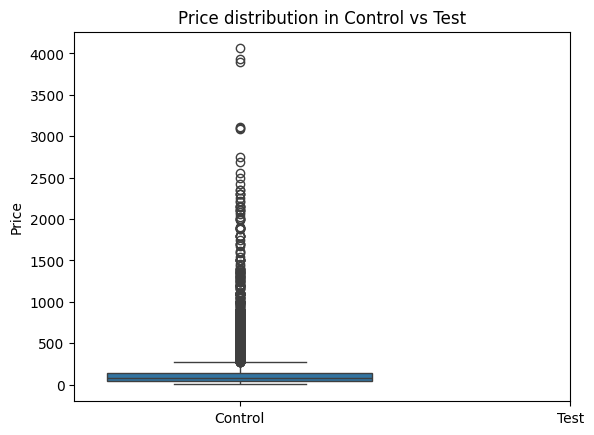

In [63]:
print("Control mean price:", control_group['price'].mean())
print("Test mean price:", test_group['price'].mean())

# Optional: visualize
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=[control_group['price'], test_group['price']])
plt.xticks([0,1], ['Control', 'Test'])
plt.title("Price distribution in Control vs Test")
plt.ylabel("Price")
plt.show()


In [64]:
control_group['price'].describe()

count    16936.000000
mean       123.230202
std        193.873343
min          0.850000
25%         39.990000
50%         77.985000
75%        135.000000
max       4590.000000
Name: price, dtype: float64

In [65]:
test_group['price'].describe()

count    16951.000000
mean       122.770952
std        188.798920
min          0.850000
25%         39.900000
50%         75.900000
75%        134.990000
max       4059.000000
Name: price, dtype: float64

In [66]:
def compare_distribution(df1, df2, col):
    print(f"\nComparing {col} distribution:")
    dist1 = df1[col].value_counts(normalize=True).sort_index()
    dist2 = df2[col].value_counts(normalize=True).sort_index()
    comparison = pd.concat([dist1, dist2], axis=1)
    comparison.columns = ['Control', 'Test']
    return comparison.fillna(0)

def plot_distribution_comparison(df1, df2, col):
    import matplotlib.pyplot as plt
    dist1 = df1[col].value_counts(normalize=True).sort_index()
    dist2 = df2[col].value_counts(normalize=True).sort_index()

    pd.DataFrame({'Control': dist1, 'Test': dist2}).plot(
        kind='bar', figsize=(10,5), title=f"Distribution of {col}"
    )
    plt.xticks(rotation=45)
    plt.ylabel("Proportion")
    plt.tight_layout()
    plt.show()


Comparing payment_type distribution:


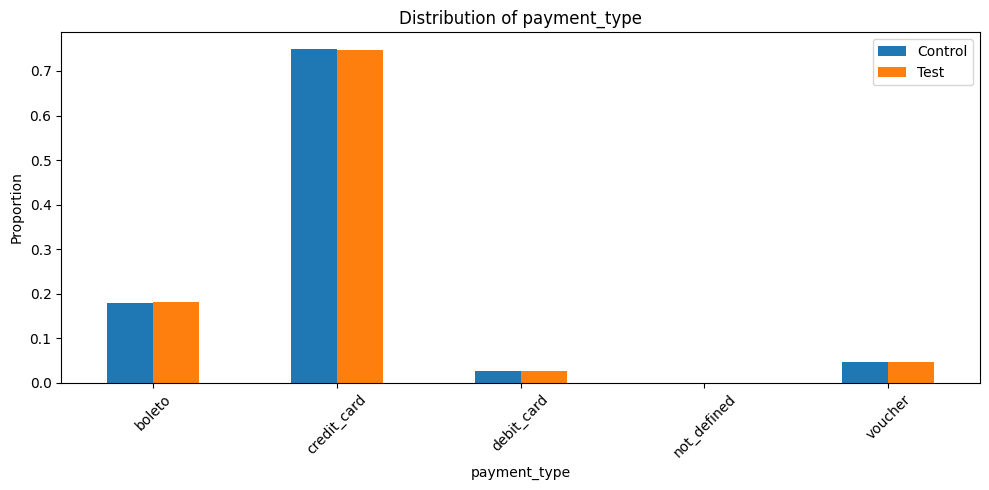

In [67]:
compare_distribution(control_group, test_group, 'payment_type')
plot_distribution_comparison(control_group, test_group, 'payment_type')


Comparing review_score distribution:


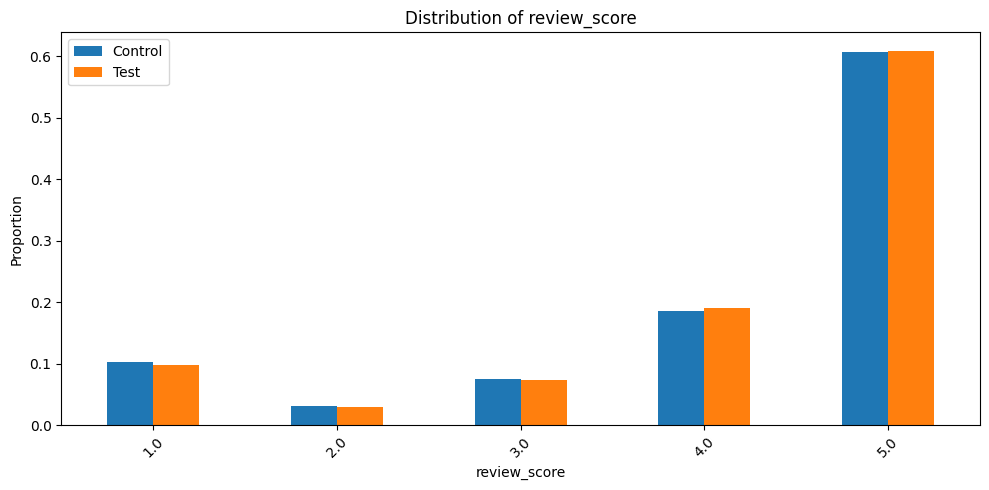

In [69]:
compare_distribution(control_group, test_group, 'review_score')
plot_distribution_comparison(control_group, test_group, 'review_score')

In [70]:
control_group['purchase_month'] = control_group['order_purchase_timestamp'].dt.to_period('M')
test_group['purchase_month'] = test_group['order_purchase_timestamp'].dt.to_period('M')

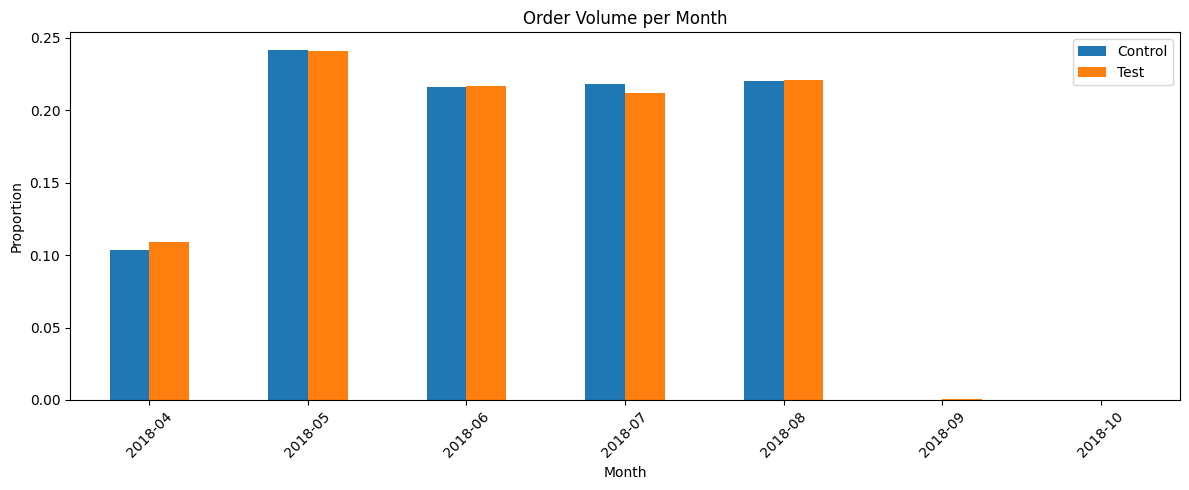

In [71]:
monthly_control = control_group['purchase_month'].value_counts(normalize=True).sort_index()
monthly_test = test_group['purchase_month'].value_counts(normalize=True).sort_index()

pd.DataFrame({'Control': monthly_control, 'Test': monthly_test}).plot(kind='bar', figsize=(12,5))
plt.title("Order Volume per Month")
plt.ylabel("Proportion")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [72]:
chi_square_test(control_group, test_group, 'payment_type')



Chi-square test for payment_type: p-value = 0.9334
No significant difference (balanced)


In [74]:
chi_square_test(control_group, test_group, 'review_score')


Chi-square test for review_score: p-value = 0.6186
No significant difference (balanced)


In [75]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(control_group['price'], test_group['price'], equal_var=False)
print(f"t-test on price: p = {p_val:.4f}")
if p_val < 0.05:
    print("Statistically significant difference in prices")
else:
    print("No significant difference in prices")


t-test on price: p = nan
No significant difference in prices
